In [42]:
import math
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from sympy import *
from matplotlib import cm
from scipy.stats import multivariate_normal
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy import integrate
from sklearn.datasets import load_iris
%matplotlib inline

In [269]:
L_sm = 700
R = 8.31
mu = 29.04
ck = 273.15
g_t = 0.03
frq_kHz = [1.13,2.64, 3.4, 4.29, 5.11]
temp_c = [21.6, 21.6, 21.2, 21.2, 21.2]

In [245]:
data_offset_mm = [
    list([220,75]), 
    list([215,150,83,20]), 
    list([220,170,120,68,18]), 
    list([227,187,147,106,67,25]),
    list([212,180,145,112,77,44,10]), 
]

In [246]:
for i in range(5):
    data_offset_mm[i].reverse()

In [204]:
for i in range(5):
    for j in range(len(data_offset_mm[i])):
        print(data_offset_mm[i][j], end='&')
    print()

75&104&130&167&220&
20&83&150&215&
18&68&120&170&220&
25&67&106&147&187&227&
10&44&77&112&145&180&212&


In [61]:
def prv(a,b):
    c = []
    for i in range(len(a)):
        c.append(a[i]*b[i])
    return np.array(c)

In [98]:
def mnk_val(x,y):
    x = np.array(x)
    y = np.array(y)
    t = prv(x,y).mean() - x.mean()*y.mean()
    b = prv(x,x).mean() - x.mean()**2
    t = float(t)
    b = float(b)
    return t/b

def err(x,y,k):
    x = np.array(x)
    y = np.array(y)
    t = prv(y,y).mean() - y.mean()**2
    b = prv(x,x).mean() - x.mean()**2
    t = float(t)
    b = float(b)
    return sqrt((t/b - k*k)/len(x))

def mnk_b(x,y,k):
    x = np.array(x)
    y = np.array(y)
    return y.mean() - k*x.mean()

In [288]:
k = [] 
sk = []
b = []
for i in range(5):
    k.append(mnk_val(np.arange(len(data_offset_mm[i])), data_offset_mm[i]))
    b.append(mnk_b(np.arange(len(data_offset_mm[i])), data_offset_mm[i],k[i]))
    sk.append(2*err(np.arange(len(data_offset_mm[i])), data_offset_mm[i],k[i]))
    if i == 0:
        sk[i] = 0.04*k[i]

In [207]:
for i in range(5):
    print(round(k[i],1), round(sk[i],1), round(sk[i]/k[i]*100,1))

35.3 4.8 13.5
65.2 0.7 1.1
50.6 0.3 0.6
40.3 0.3 0.6
33.8 0.2 0.7


In [254]:
def plott(x,y,i,k,sk,b):
    x = np.array(x)
    y = np.array(y)
    x = np.arange(1, len(x) + 1)
    mls = [i*k+b for i in range(len(x))]
    msup = [i*k+b + 2*sk for i in range(len(x))]
    msdw = [i*k+b - 2*sk for i in range(len(x))]
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.title(r'$\nu = $' + str(frq_kHz[i]) + 'KHz')
    plt.plot(x,y,'*g')
    plt.plot(x,mls,'r--')
    plt.plot(x,msup,'b--')
    plt.plot(x,msdw,'b--')
    plt.legend(loc='best')
    plt.ylim(y[0]*0.7,y[len(y)-1]*1.05)
    plt.xlabel(r'$n$')
    plt.ylabel(r'$\Delta, mm$')
    plt.xlim(0.5, len(x) + 0.5)
    plt.show()
    
def gamm(k,f,T):
    return (4*mu*k*k*f*f)/(R*T)*10**(-3)

def zv(k,f):
    return 2*k*f

/Users/sergmiller/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


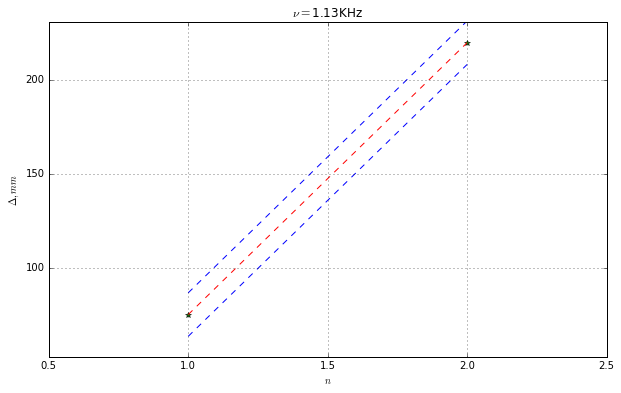

k:  145.0 s_k:  5.8 zv  327.7 s_zv  13.5 eps_zv  4.12 g:  1.27 s_g:  0.127 eps:  10.0


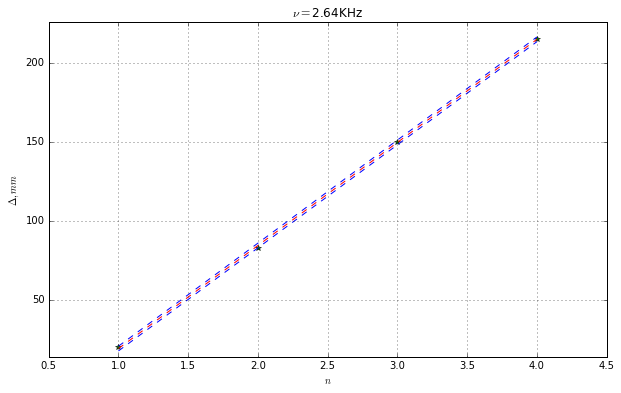

k:  65.2 s_k:  0.75 zv  344.3 s_zv  5.2 eps_zv  1.52 g:  1.41 s_g:  0.09 eps:  6.4


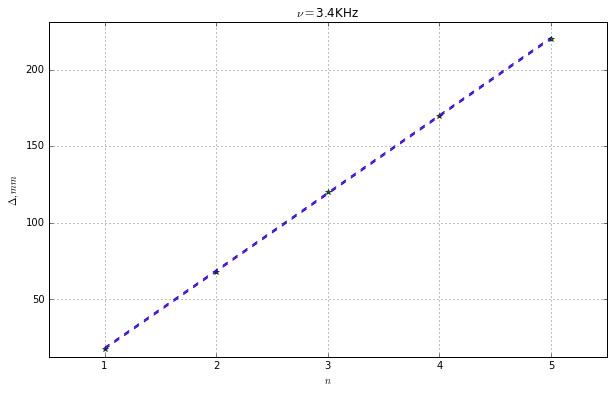

k:  50.6 s_k:  0.31 zv  344.1 s_zv  4.0 eps_zv  1.17 g:  1.41 s_g:  0.086 eps:  6.1


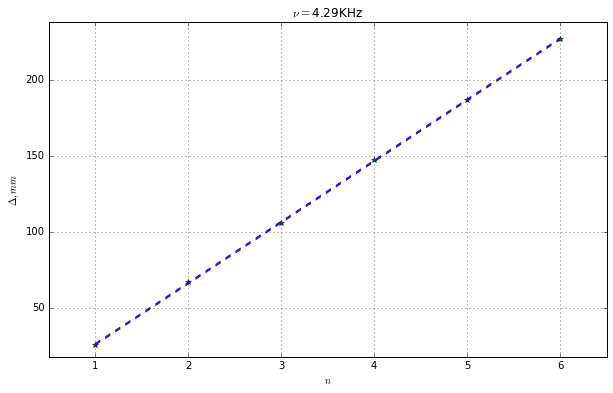

k:  40.31 s_k:  0.26 zv  345.9 s_zv  4.1 eps_zv  1.19 g:  1.42 s_g:  0.087 eps:  6.1


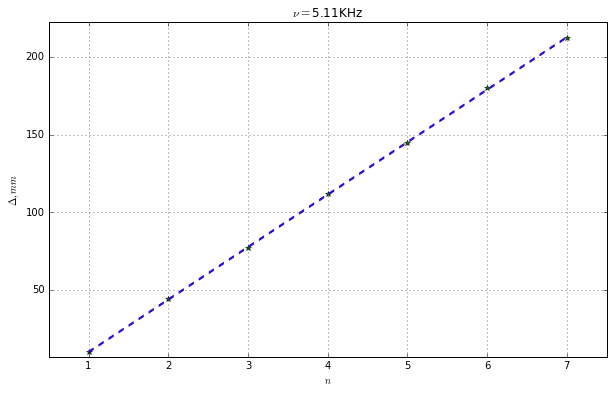

k:  33.79 s_k:  0.22 zv  345.3 s_zv  4.1 eps_zv  1.2 g:  1.42 s_g:  0.087 eps:  6.1
4.40944520585147 0.0876307063147381


In [292]:
sum_zv = 0
sum_g = 0
for i in range(5):
    plott(np.arange(len(data_offset_mm[i])), data_offset_mm[i], i, k[i], sk[i],b[i])
    gm = gamm(k[i], frq_kHz[i], temp_c[i] + ck)
    sg = gm * sqrt(4*(sk[i]/k[i])**2 + 4*g_t**2 + (0.1/(temp_c[i] + ck))**2)
    v_zv = zv(k[i], frq_kHz[i])
    pct = sg/gm*100
    
    sv_zv = v_zv*sqrt(((sk[i]/k[i])**2 + 0.01**2))
    if i > 0:
        sum_zv += sv_zv**2
        sum_g += sg**2
    print('k: ',round(k[i],2),'s_k: ', round(sk[i],2),'zv ', round(v_zv,1),'s_zv ', round(sv_zv,1), 'eps_zv ', round(sv_zv/v_zv*100, 2) , 'g: ', round(gm, 2) ,'s_g: ', round(sg,3), 'eps: ', round(pct, 1))
sum_zv = sqrt(sum_zv/4)
sum_g = sqrt(sum_g/4)
print(sum_zv,sum_g)

In [244]:
f = open('C_p:C_v.tex', 'r')
text = f.read()
f.close()

new_text = str()
for i in range(len(text)-1):
    if text[i] == 'и' and text[i+1] ==' ̆':
        new_text +='й'
        i += 1
        continue
    if text[i] == 'е' and text[i+1] == ' ̈':
        new_text += 'ё'
        i += 1
        continue
    new_text += text[i]
new_text = str(new_text)
print(new_text)
f = open('C_p:C_v.tex', 'w')
for i in range(len(new_text)):
    f.write(new_text[i])
f.close()

\documentclass[12pt]{article}
% Эта строка — комментарий, она не будет показана в выходном файле
\usepackage{ucs}
\usepackage[utf8x]{inputenc} % Включаем поддержку UTF8
\usepackage[russian]{babel}  % Включаем пакет для поддержки русского языка
\usepackage{amsmath}
\usepackage{amssymb}
\usepackage{mathtools}

\hoffset=0mm
\voffset=0mm
\textwidth=170mm        % ширина текста
\oddsidemargin=-0mm   % левое поле 25.4 - 5.4 = 20 мм
\textheight=240mm       % высота текста 297 (A4) - 40
\topmargin=-15.4mm      % верхнее поле (10мм)
\headheight=5mm      % место для колонтитула
\headsep=5mm          % отступ после колонтитула
\footskip=8mm         % отступ до нижнего колонтитула

\title{Лабораторная работа № 2.1:
    Определение $C_p/C_v$ по скорости звука в газе    
}
\date{\today}
\author{Миллер Сергей 494}

\begin{document}
    \maketitle
    \textbf{Цель работы:}1)  измерение частоты колебаний и длины волны при резонансе звуковых колебаний в газе, заполняющем трубу; 2) определение показателя

In [235]:
# print(text)
print(type(text))

<class 'str'>
